In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [7]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Namzz28/Data-Science-Projects/refs/heads/main/Red%20Wine%20Quality/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preprocessing

In [12]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [13]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns= {'quality' : 'good_quality'}, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Exploratory Data Analysis

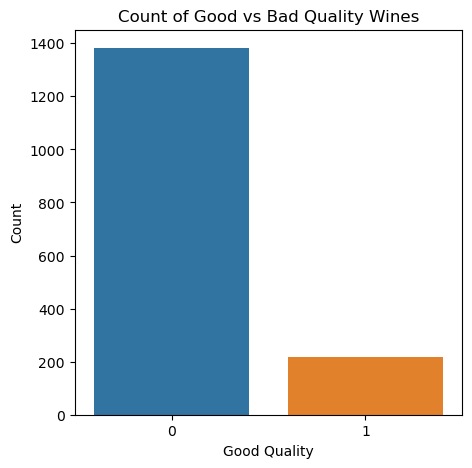

In [15]:
plt.figure(figsize= (5,5))
sns.countplot(x = 'good_quality', data= df)
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.title('Count of Good vs Bad Quality Wines')
plt.show()

##### Analysis of coorelation between feautures

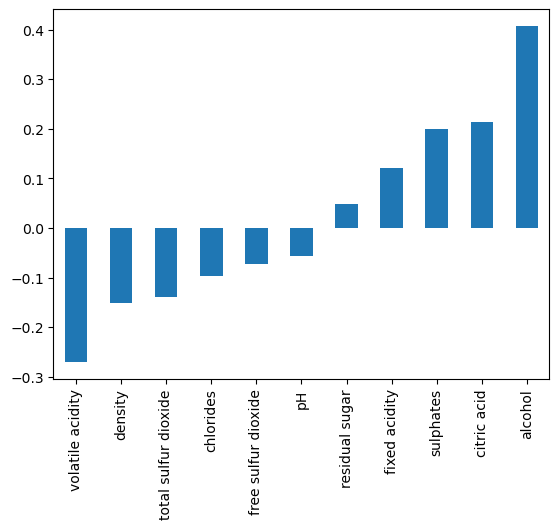

In [27]:
df.corr()['good_quality'][:-1].sort_values().plot(kind= 'bar')
plt.show()

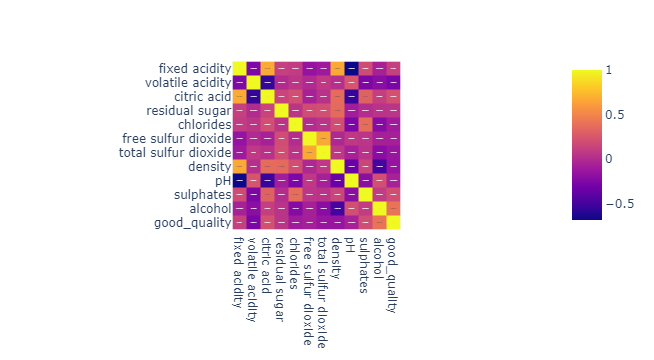

In [167]:
# plt.figure(figsize = (10,6))
# sns.heatmap(df.corr(), annot = True)
# plt.show()
px.imshow(df.corr(), width= aspect= 'equal',text_auto= True)

<Axes: xlabel='residual sugar', ylabel='alcohol'>

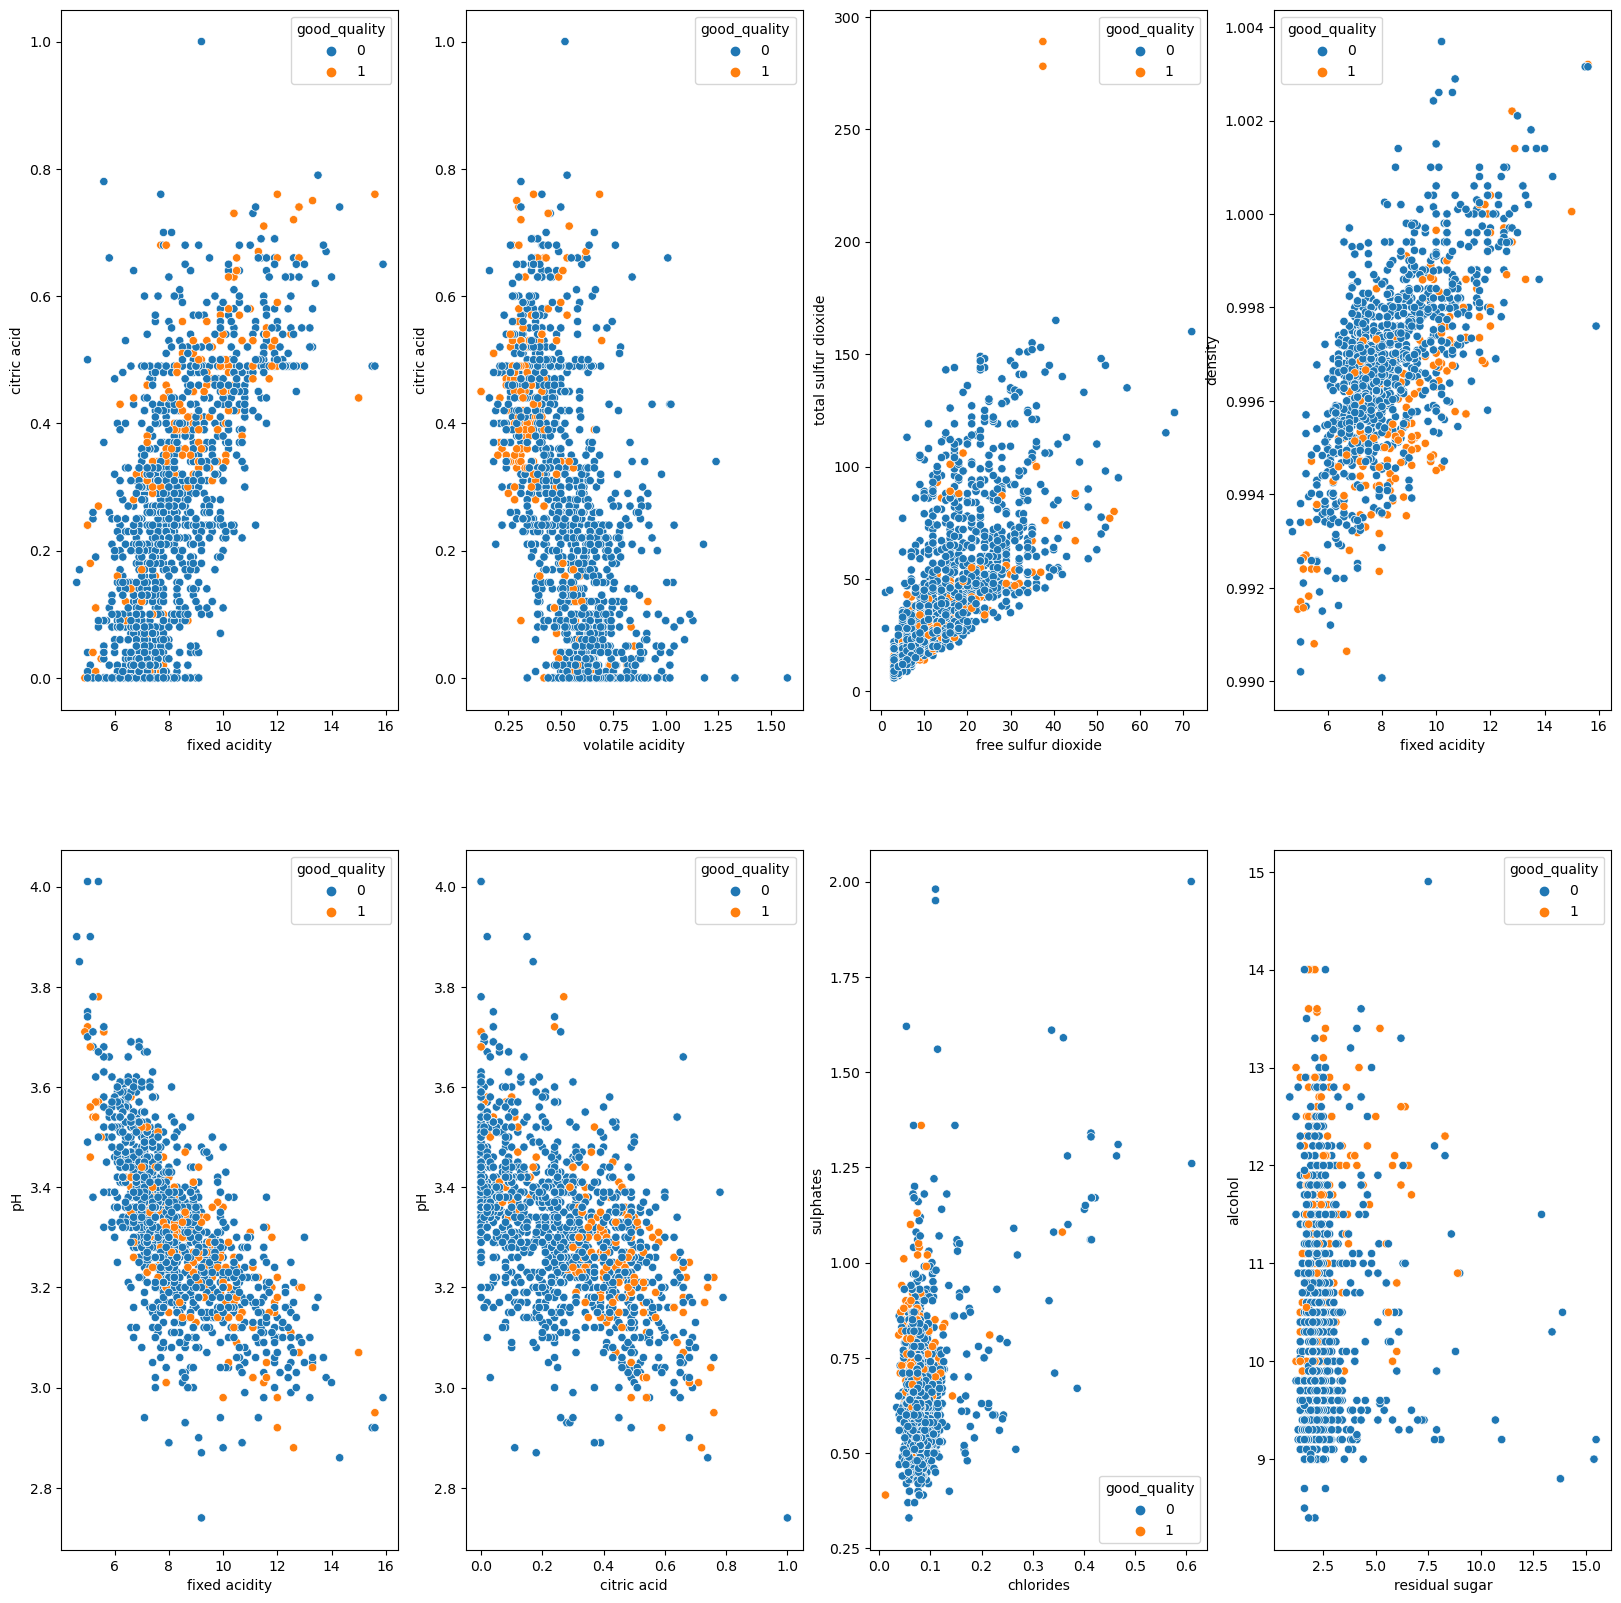

In [37]:
fig, ax = plt.subplots(2,4, figsize = (20,20))
sns.scatterplot(x = 'fixed acidity', y = 'citric acid', hue = 'good_quality',data = df, ax = ax[0,0] )
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'good_quality',data = df, ax = ax[0,1] )
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'good_quality',data = df, ax = ax[0,2] )
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'good_quality',data = df, ax = ax[0,3] )
sns.scatterplot(x = 'fixed acidity', y = 'pH', hue = 'good_quality',data = df, ax = ax[1,0] )
sns.scatterplot(x = 'citric acid', y = 'pH', hue = 'good_quality',data = df, ax = ax[1,1] )
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'good_quality',data = df, ax = ax[1,2] )
sns.scatterplot(x = 'residual sugar', y = 'alcohol', hue = 'good_quality',data = df, ax = ax[1,3] )

### Train Test Split

In [42]:
X = df.drop('good_quality', axis = 1).values
y = df['good_quality'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Model Training

### Logistic Regression

In [45]:
lr = LogisticRegression()
lr

LogisticRegression()

In [46]:
# training the model
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

C:\Users\navup\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8829311885612153

In [47]:
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.86875

### Support Vector Machine(SVM)

In [54]:
clf = svm.SVC(kernel = 'rbf')
clf

SVC()

In [55]:
# training the model
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8668453976764968

In [59]:
# testing the model
sv_pred = clf.predict(X_test)
accuracy_score(y_test, sv_pred)

0.8625

### Decision Tree

In [73]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [74]:
# training the model
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

In [75]:
# testing the model
tr_pred = dtree.predict(X_test)
accuracy_score(y_test, tr_pred)

0.8645833333333334

### K-Nearest Neighbours(KNN)

In [83]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier()

In [84]:
# training the model
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9079535299374442

In [85]:
kn_pred = knn.predict(X_test)
accuracy_score(y_test, kn_pred)

0.8583333333333333

### Random Forest

In [86]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [87]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [90]:
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8958333333333334

## Model Evaluation

In [102]:
import plotly.express as px

### Logistic Regression

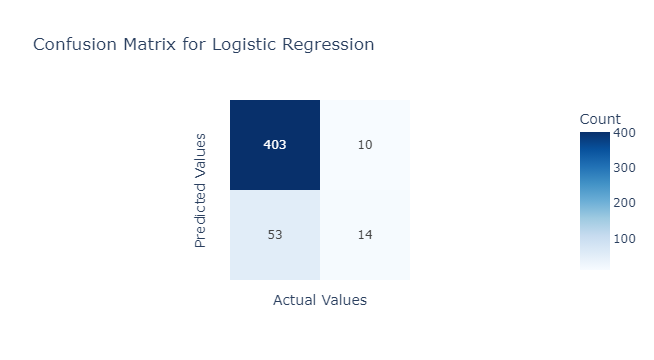

In [142]:
# Logistic Regression model evaluation
fig = px.imshow(confusion_matrix(y_test, lr_pred),
                labels = dict(x='Actual Values', 
                              y = 'Predicted Values', 
                              color= 'Count'),
                x = [0,1],
                y =[0,1] ,
                color_continuous_scale= 'blues',
                title = 'Confusion Matrix for Logistic Regression',
                text_auto = True)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [93]:
print('Logistic Regression Model Accuracy: ', accuracy_score(y_test, lr_pred))
print('Logistic Regression Model f1 Score: ', f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute: ', mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Accuracy: ', np.sqrt(mean_squared_error(y_test, lr_pred)))

Logistic Regression Model Accuracy:  0.86875
Logistic Regression Model Accuracy:  0.30769230769230765
Logistic Regression Model Accuracy:  0.13125
Logistic Regression Model Accuracy:  0.362284418654736


### Support Vector Machine(SVM)

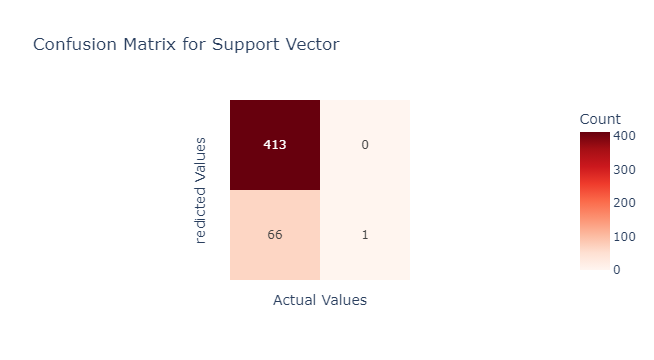

In [143]:
# SVM model evaluation
# Logistic Regression model evaluation
fig = px.imshow(confusion_matrix(y_test, sv_pred),
                labels = dict(x='Actual Values', 
                              y = 'redicted Values', 
                              color= 'Count'),
                x = [0,1],
                y =[0,1] ,
                color_continuous_scale= 'reds',
                title = 'Confusion Matrix for Support Vector',
                text_auto = True)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [147]:
print('Support Vector Machine Model Accuracy: ', accuracy_score(y_test, sv_pred))
print('Support Vector Machine Model f1 Score: ', f1_score(y_test, sv_pred))
print('Support Vector Machine Model Mean Absolute: ', mean_absolute_error(y_test, sv_pred))
print('Support Vector Machine Model Accuracy: ', np.sqrt(mean_squared_error(y_test, sv_pred)))

Support Vector Machine Model Accuracy:  0.8625
Support Vector Machine Model f1 Score:  0.029411764705882353
Support Vector Machine Model Mean Absolute:  0.1375
Support Vector Machine Model Accuracy:  0.37080992435478316


### Decision Tree

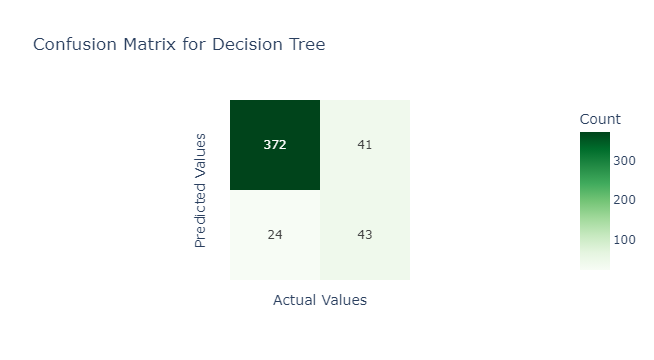

In [148]:
# Decision Tree model evaluation
# Logistic Regression model evaluation
fig = px.imshow(confusion_matrix(y_test, tr_pred),
                labels = dict(x='Actual Values', 
                              y = 'Predicted Values', 
                              color= 'Count'),
                x = [0,1],
                y =[0,1] ,
                color_continuous_scale= 'greens',
                title = 'Confusion Matrix for Decision Tree',
                text_auto = True)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [149]:
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, tr_pred))
print('Decision Tree Model f1 Score: ', f1_score(y_test, tr_pred))
print('Decision Tree Model Mean Absolute: ', mean_absolute_error(y_test, tr_pred))
print('Decision Tree Model Accuracy: ', np.sqrt(mean_squared_error(y_test, tr_pred)))

Decision Tree Model Accuracy:  0.8645833333333334
Decision Tree Model f1 Score:  0.5695364238410596
Decision Tree Model Mean Absolute:  0.13541666666666666
Decision Tree Model Accuracy:  0.3679900360969936


### K-Nearest Neighbors(KNN)

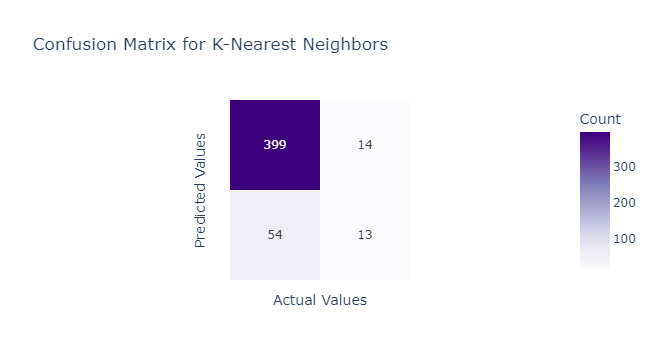

In [145]:
# Logistic Regression model evaluation
fig = px.imshow(confusion_matrix(y_test, kn_pred),
                labels = dict(x='Actual Values', 
                              y = 'Predicted Values', 
                              color= 'Count'),
                x = [0,1],
                y =[0,1] ,
                color_continuous_scale= 'purples',
                title = 'Confusion Matrix for K-Nearest Neighbors',
                text_auto = True)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [150]:
print('K-Nearest Neighbors Model Accuracy: ', accuracy_score(y_test, kn_pred))
print('K-Nearest Neighbors Model f1 Score: ', f1_score(y_test, kn_pred))
print('K-Nearest Neighbors Model Mean Absolute: ', mean_absolute_error(y_test, kn_pred))
print('K-Nearest Neighbors Model Accuracy: ', np.sqrt(mean_squared_error(y_test, kn_pred)))

K-Nearest Neighbors Model Accuracy:  0.8583333333333333
K-Nearest Neighbors Model f1 Score:  0.276595744680851
K-Nearest Neighbors Model Mean Absolute:  0.14166666666666666
K-Nearest Neighbors Model Accuracy:  0.3763863263545405


### Random Forest

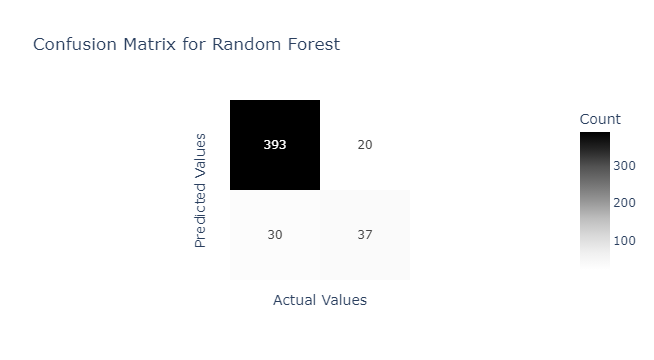

In [146]:
# Logistic Regression model evaluation
fig = px.imshow(confusion_matrix(y_test, rf_pred),
                labels = dict(x='Actual Values', 
                              y = 'Predicted Values', 
                              color= 'Count'),
                x = [0,1],
                y =[0,1] ,
                color_continuous_scale= 'greys',
                title = 'Confusion Matrix for Random Forest',
                text_auto = True)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [151]:
print('Random Forest Model Accuracy: ', accuracy_score(y_test, rf_pred))
print('Random Forest Model f1 Score: ', f1_score(y_test, rf_pred))
print('Random Forest Model Mean Absolute: ', mean_absolute_error(y_test, rf_pred))
print('Random Forest Model Accuracy: ', np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest Model Accuracy:  0.8958333333333334
Random Forest Model f1 Score:  0.5967741935483871
Random Forest Model Mean Absolute:  0.10416666666666667
Random Forest Model Accuracy:  0.3227486121839514


### Model Evaluation

C:\Users\navup\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



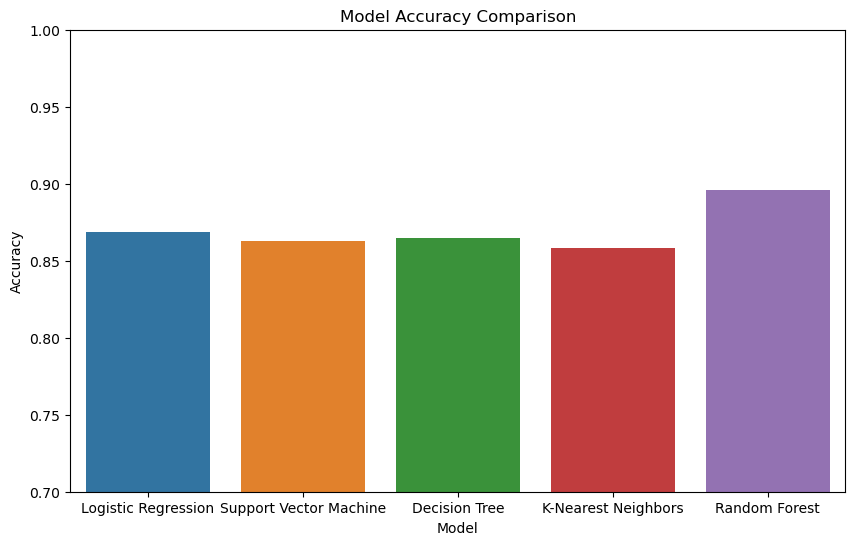

In [153]:
models = ['Logistic Regression', 'Support Vector Machine',
          'Decision Tree', 'K-Nearest Neighbors','Random Forest']
accuracy = [accuracy_score(y_test, lr_pred),accuracy_score(y_test, sv_pred),
            accuracy_score(y_test, tr_pred),accuracy_score(y_test, kn_pred),
            accuracy_score(y_test, rf_pred)]
plt.figure(figsize=(10,6))
sns.barplot(x = models, y = accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7,1.0)
plt.show()

### Conclusion

It is observed that the Random Forest model performs the best on the test set with an accuracy of 89.58%. The model can predict the quality of the wine based on the given features with an accuracy of 89.58%.